# Principal Component Analysis (PCA)

This notebook will guide you through the use of PCA for reducing the dimensionality a dataset. There are several ways to compute PCA in python. In this notebook, you are going to use the implementation in the sklearn package. (class **sklearn.decomposition.PCA** in https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Let's first import some useful packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import pandas as pd

%matplotlib inline

### Reading the dataset
You are going to use the wine dataset available at the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Wine). Download it and put it at the notebook's folder.

In [2]:
import requests
from pathlib import Path

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine_data = Path("wine.data")

if not wine_data.exists():
    print("Downloading data")
    respo = requests.get(url, stream=True, verify=False)
    if respo.status_code == requests.codes.ok:
        out = open(wine_data, "wb")
        for block in respo.iter_content(1024):
            if not block:
                break
            out.write(block)
        out.close()
    else:
        print(f"Not able to download file url {url}: {respo.status_code}, {respo.content}")

In [3]:
data = np.genfromtxt(wine_data, delimiter=',')
data_features = pd.DataFrame(data[:,1:], columns=['EV'+str(i) for i in range(data.shape[1]-1)])
print('Wine dataset shape:', data_features.shape)
data_class = data[:,0].astype('int') - 1
colors = [(['r', 'g', 'b'])[i] for i in data_class]

Wine dataset shape: (178, 13)


### Visualizing the raw data
The wine dataset has 13 input features, and it is still possible (with some limitations) to visualize it using a scatterplot matrix. This method becomes inpractical if the dataset has much more variables.

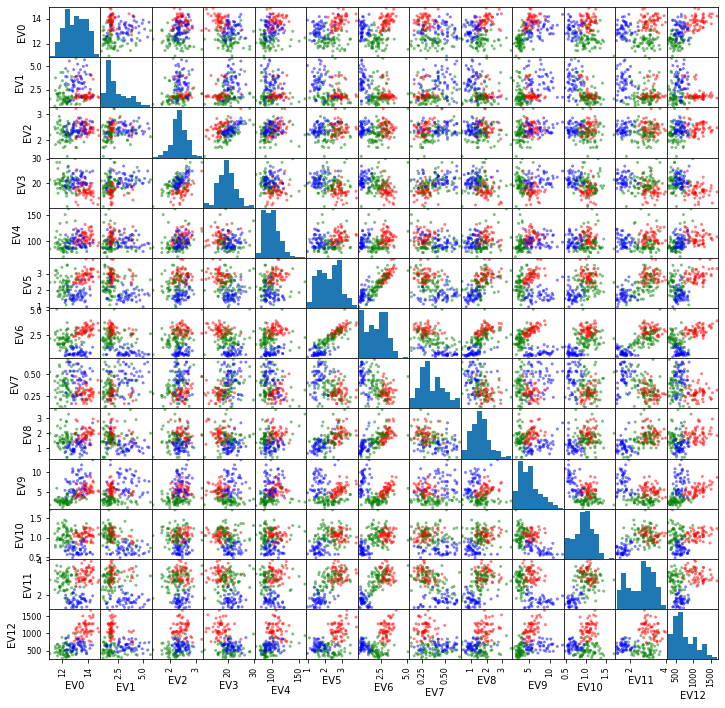

In [4]:
pd.plotting.scatter_matrix(data_features, c=colors, figsize=(12,12), linewidths=0);

### Computing PCA
Now let's use the matplotlib API to compute PCA on the wine dataset. The following cell creates an instance of the PCA class which computes the eigenvectors matrix which is useful to re-project the raw data. It also shows the proportion of variance explained by each individual independent dimension.

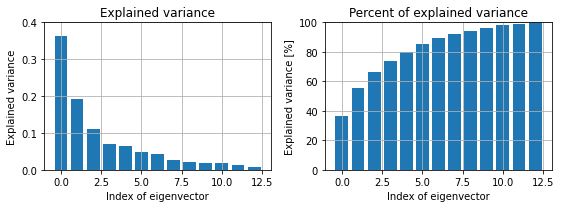

In [5]:
# we need to standardize data at first

scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

# computing PCA
pca = PCA(n_components=data_features_scaled.shape[1])
pca.fit(data_features_scaled)

pl.figure(figsize=(8,3))
pl.subplot(1,2,1)
pl.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
pl.ylim(0.0, 0.4)
pl.title('Explained variance')
pl.xlabel('Index of eigenvector')
pl.ylabel('Explained variance')
pl.grid()
pl.subplot(1,2,2)
pl.bar(np.arange(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_))
pl.ylim(0.0, 100)
pl.title('Percent of explained variance')
pl.xlabel('Index of eigenvector')
pl.ylabel('Explained variance [%]')
pl.grid()
pl.tight_layout()

We can now re-project the data onto the set of eigenvectors. To effectively reduce the dimensionality of the input dataset, we choose only the eigenvectors that points in the direction of the higher variance. The next cell allows you to select how much variance from the original dataset you want to keep in the projected version. Choosing 50% will keep 2 dimensions. If you want to keep more variance you will need to keep more dimensions.

In [6]:
target_explained_variance = 0.555
cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
min_index = np.sum(cummulated_variance < target_explained_variance)

print('The projection will try to keep', target_explained_variance*100, '% of the variance')
print(min_index + 1, 'eigenvectors are needed')
print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

projected = PCA(n_components = min_index+1).fit_transform(data_features_scaled)

The projection will try to keep 55.50000000000001 % of the variance
3 eigenvectors are needed
Keeping 66.52996889318526 % of the variance


Let's visualize the resulting projected data.

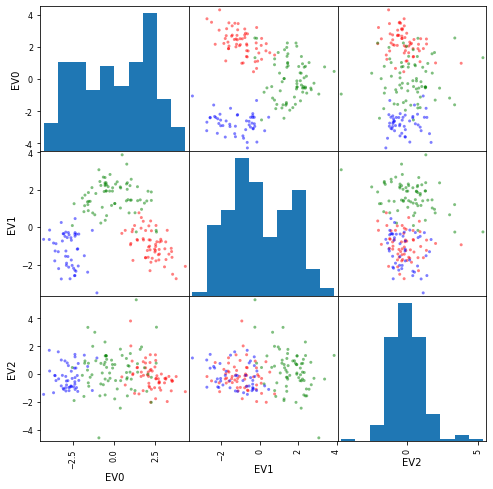

In [7]:
to_show = pd.DataFrame(projected, columns=['EV'+str(i) for i in range(projected.shape[1])])
pd.plotting.scatter_matrix(to_show, c=colors, figsize=(8,8), linewidth=0);

As you can see from the previous image, the two principal components contain enough information to allow us to visualize the three classes present in the dataset.
Let's see what happens if we keep the three principal components:

In [8]:
target_explained_variance = 0.6
cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
min_index = np.sum(cummulated_variance < target_explained_variance)

print('The projection will try to keep', target_explained_variance*100, '% of the variance')
print(min_index + 1, 'eigenvectors are needed')
print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

projected = PCA(n_components = min_index+1).fit_transform(data_features_scaled)

The projection will try to keep 60.0 % of the variance
3 eigenvectors are needed
Keeping 66.52996889318526 % of the variance


Text(0.5, 0, 'EV3')

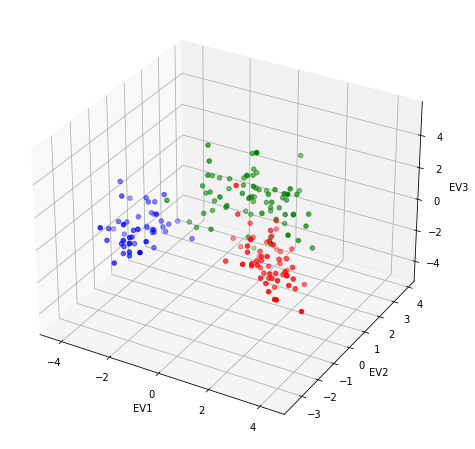

In [9]:
fig = pl.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for w in range(3):
    ax.scatter(projected[data_class==w,0], projected[data_class==w,1], projected[data_class==w,2], c=['r', 'g', 'b'][w]);
ax.set_xlabel('EV1')
ax.set_ylabel('EV2')
ax.set_zlabel('EV3')

As you can see, the third most important eigenvector does not contribute that much to the separation of the three classes  in the wine dataset.